$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 7}$
---

Instructions:
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

---
## Dataset: Facebook Live Sellers in Thailand

In [37]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error

Access Dataset

In [14]:
df = pd.DataFrame(pd.read_csv('Datasets/Live_20210128.csv'))
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [15]:
df_cleaned = df.drop(columns=['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'])

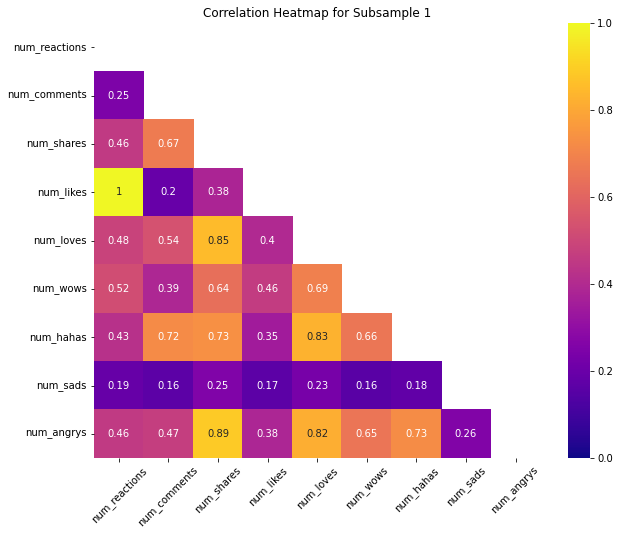

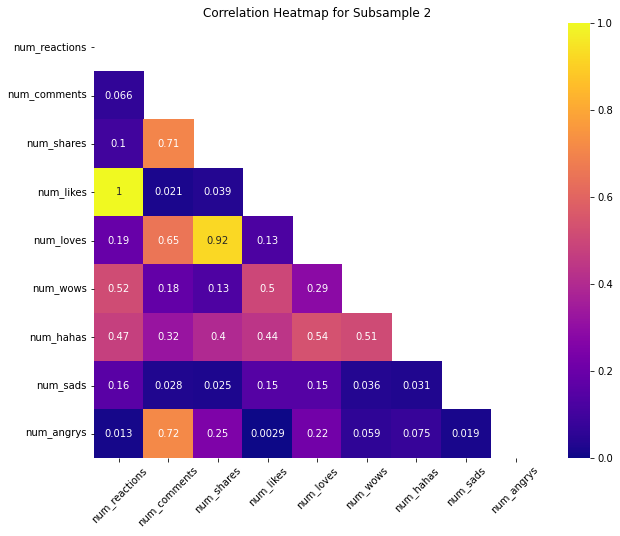

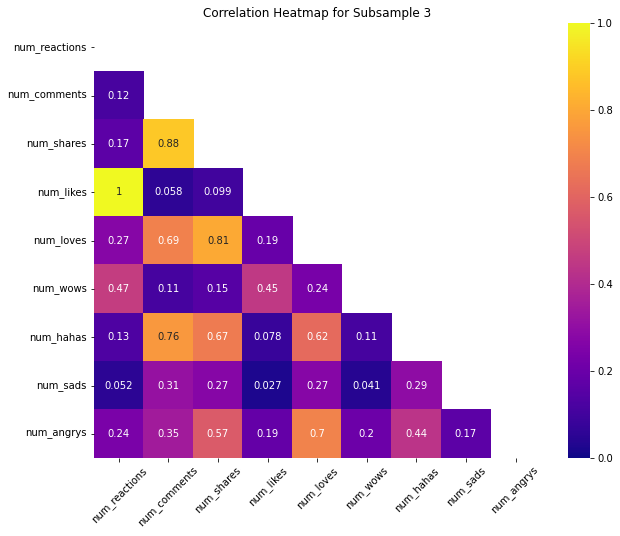

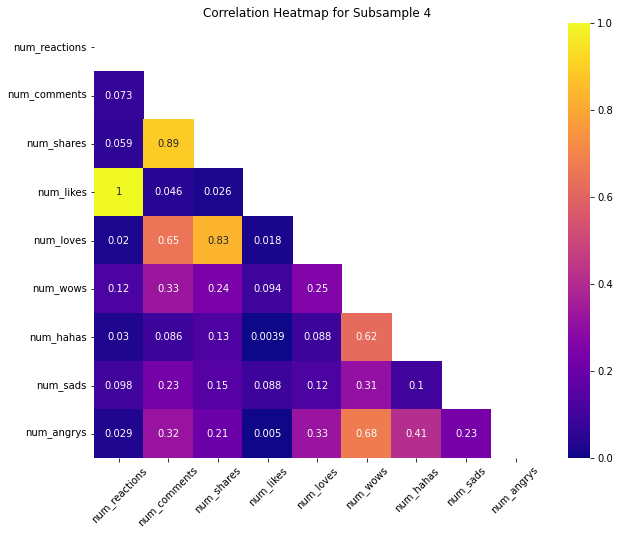

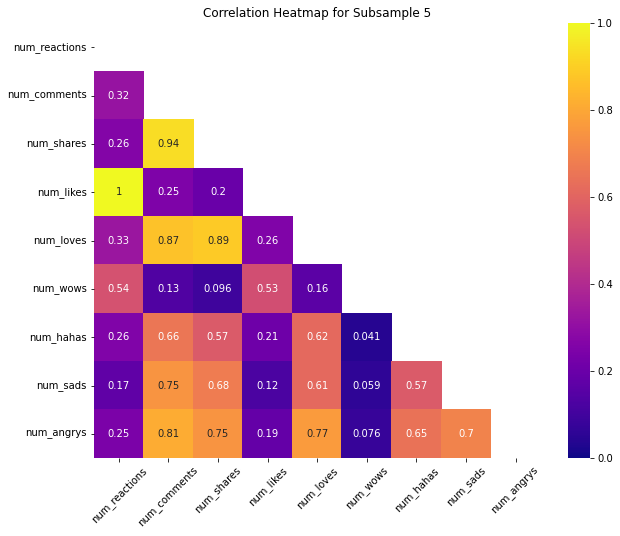

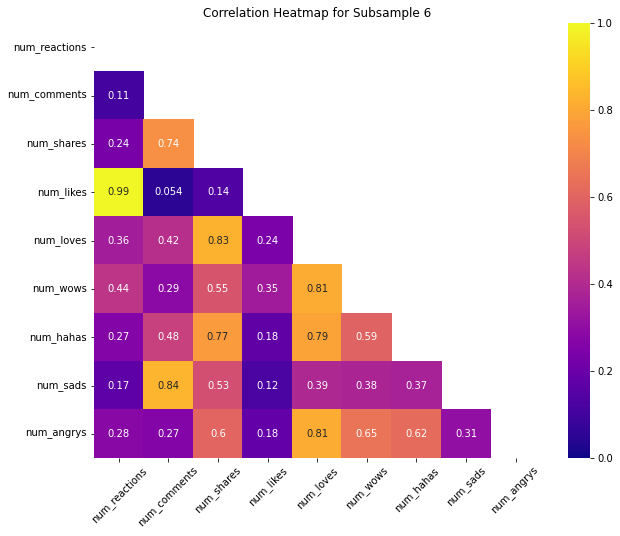

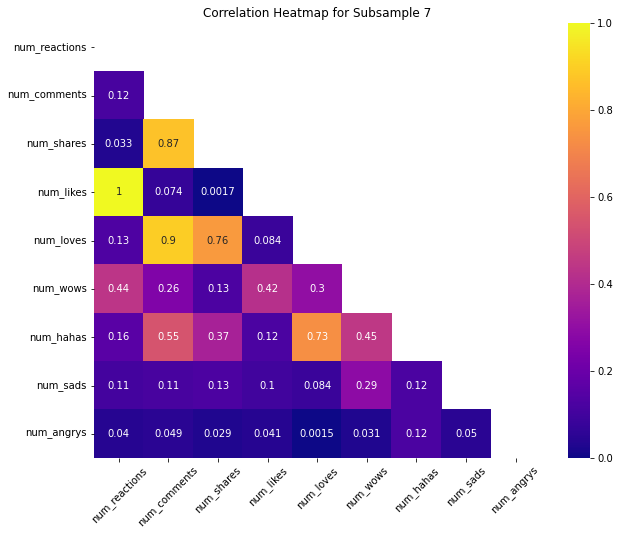

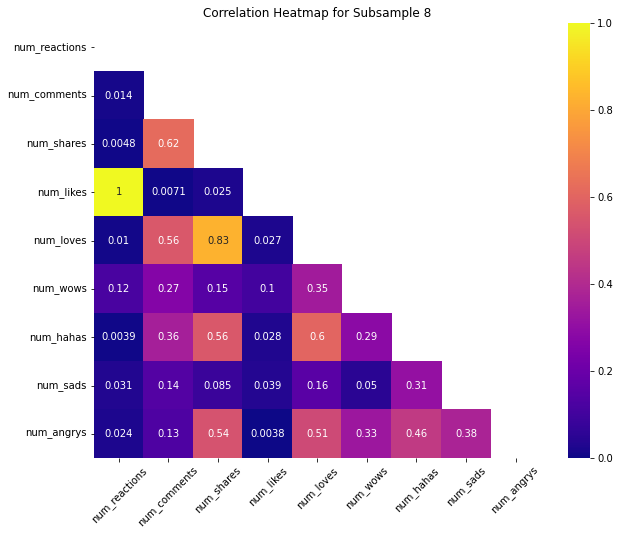

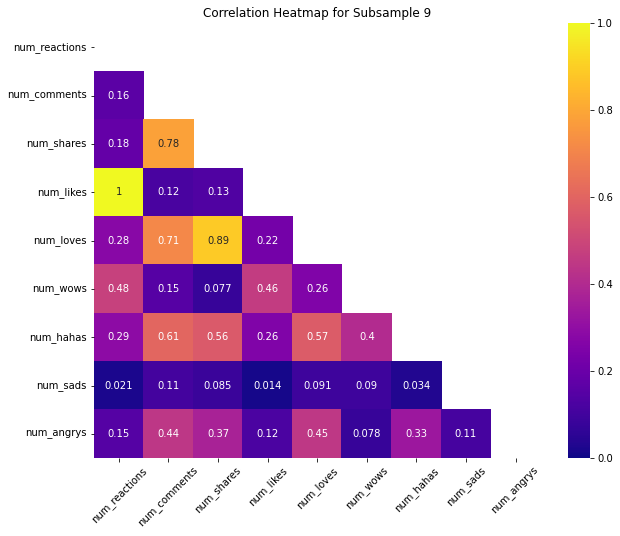

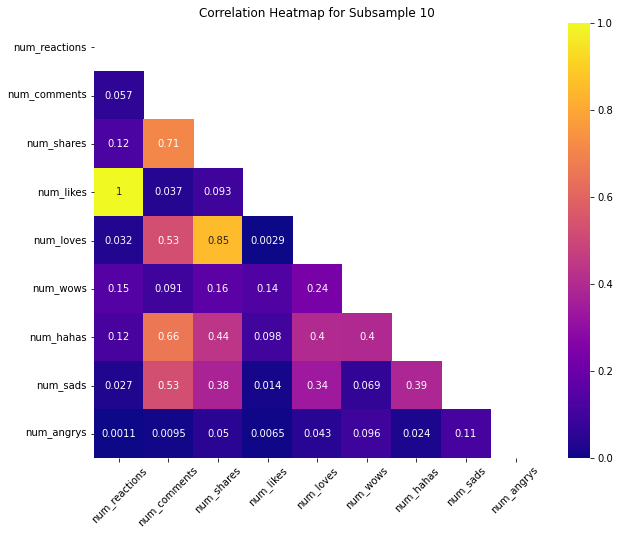

In [16]:
def create_correlation_plots(df, num_samples=10, sample_size=100):
    np.random.seed(42) 
    for i in range(num_samples):
        subsample = df.sample(sample_size)
        corr_matrix = subsample.corr().abs()
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='plasma', vmin=0, vmax=1, mask=mask)
        plt.xticks(rotation=45)  
        plt.yticks()  
        plt.title(f'Correlation Heatmap for Subsample {i+1}')
        plt.show()

create_correlation_plots(df_cleaned, num_samples=10, sample_size=100)

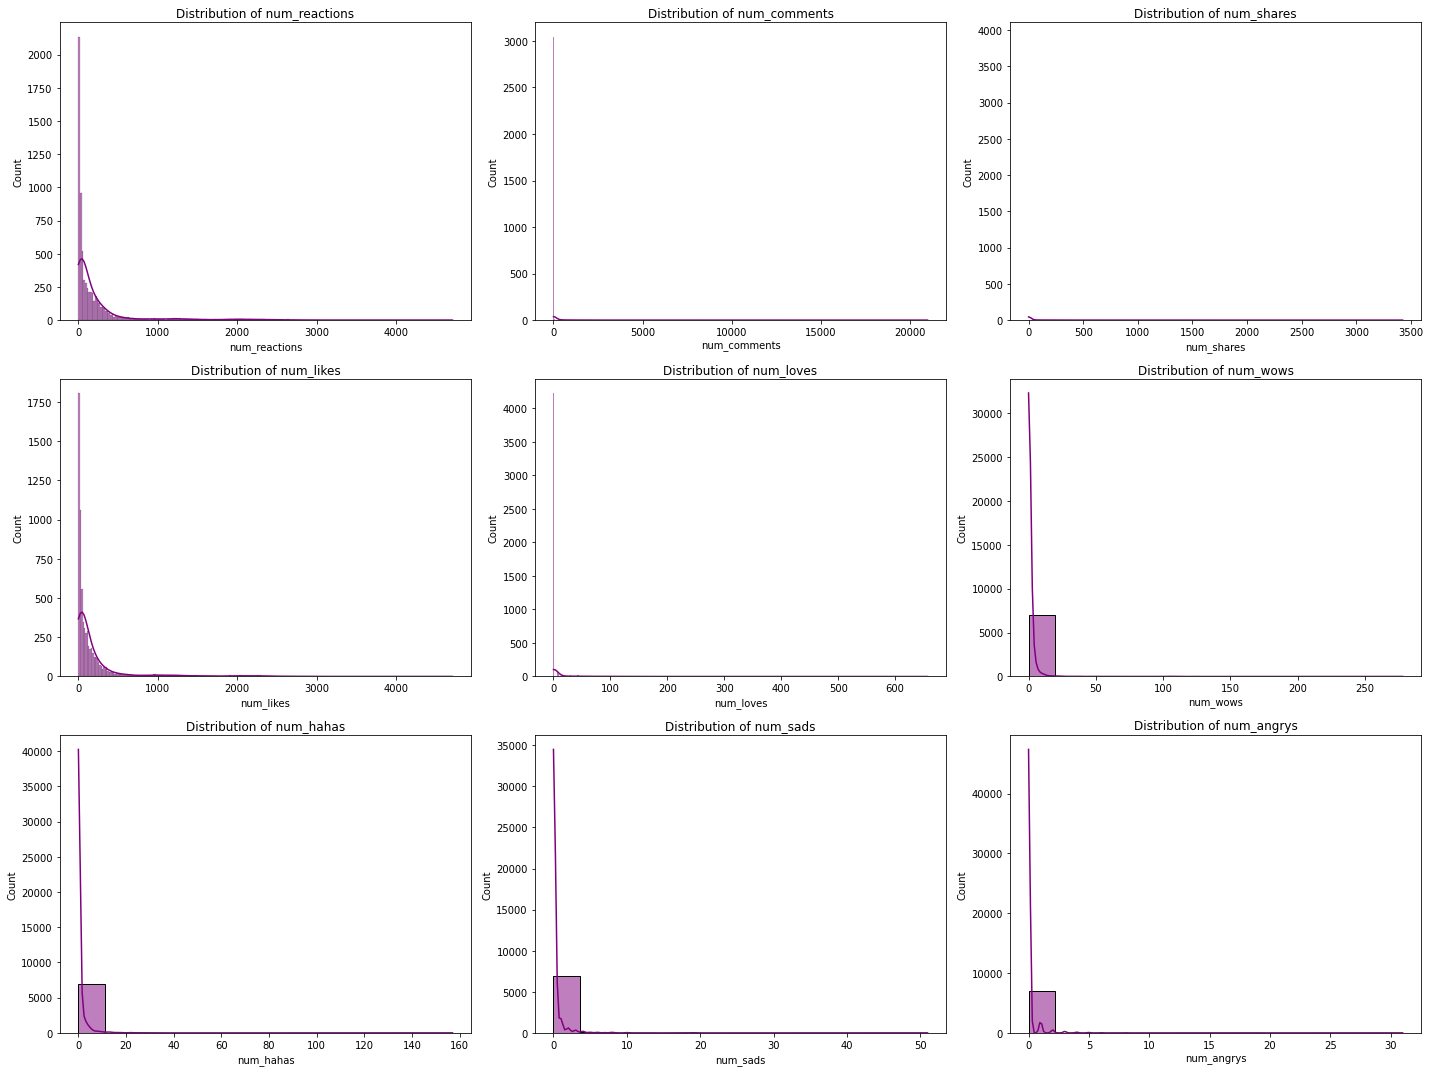

In [17]:
numerical_columns = df_cleaned.columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_cleaned[column], kde=True, color='purple')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Figure size 864x720 with 0 Axes>

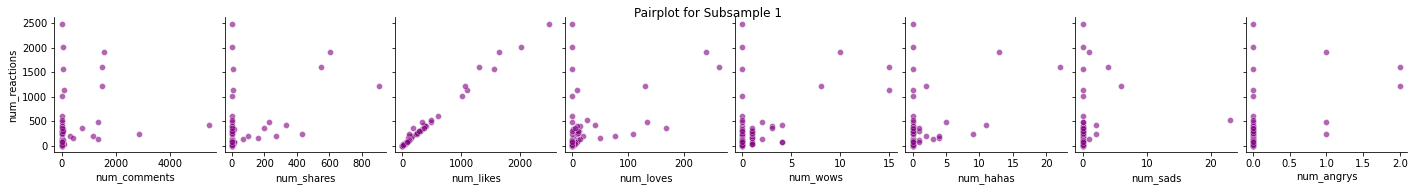

<Figure size 864x720 with 0 Axes>

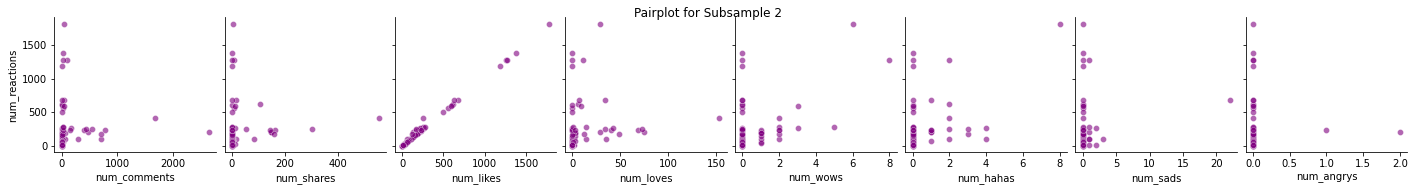

<Figure size 864x720 with 0 Axes>

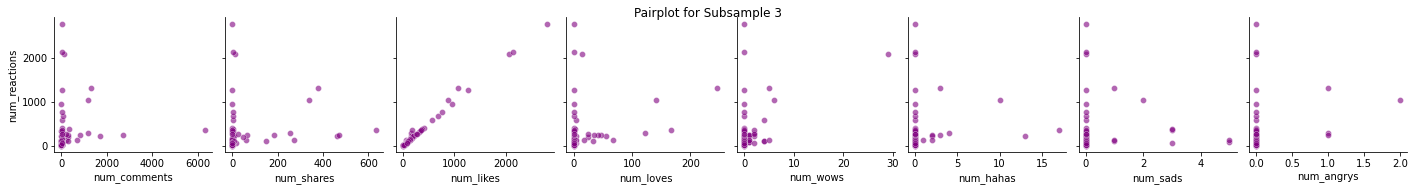

<Figure size 864x720 with 0 Axes>

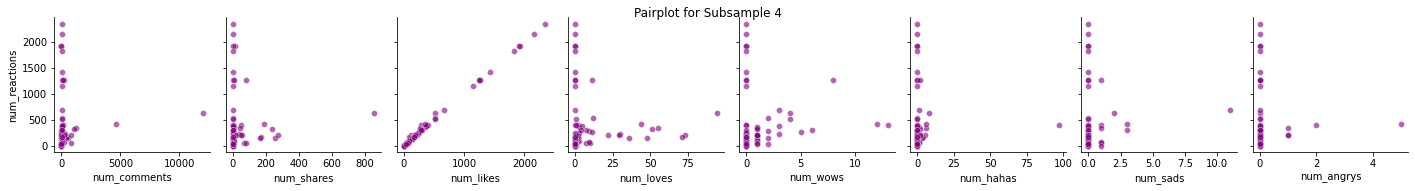

<Figure size 864x720 with 0 Axes>

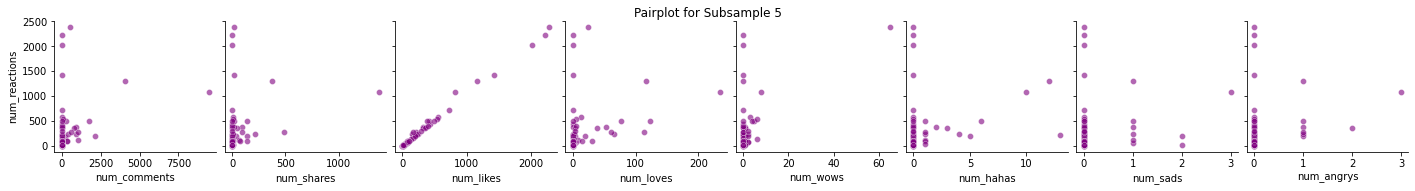

<Figure size 864x720 with 0 Axes>

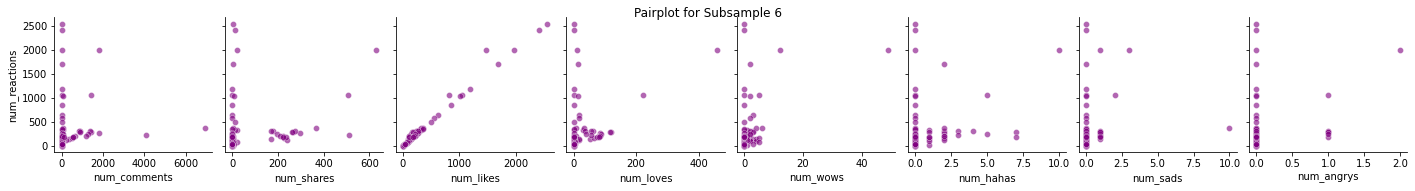

<Figure size 864x720 with 0 Axes>

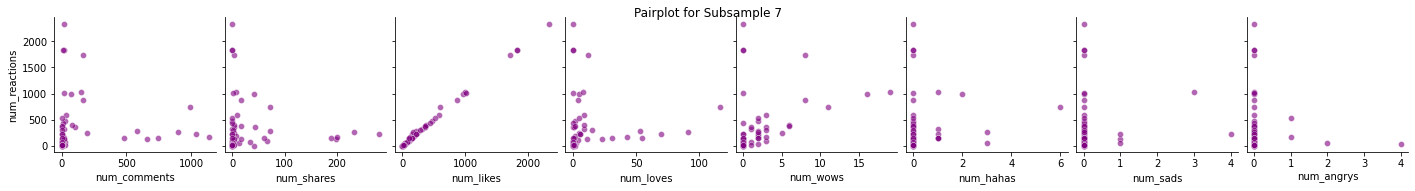

<Figure size 864x720 with 0 Axes>

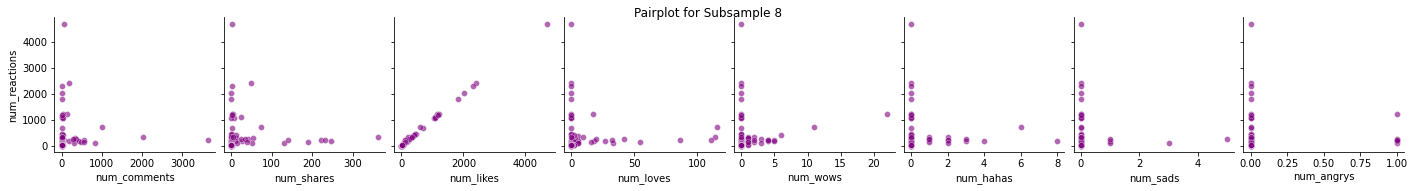

<Figure size 864x720 with 0 Axes>

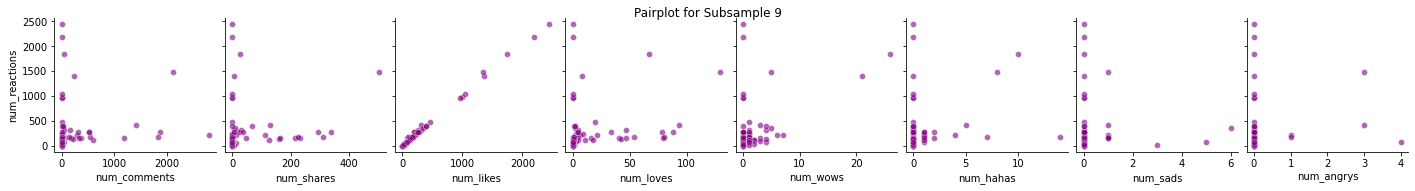

<Figure size 864x720 with 0 Axes>

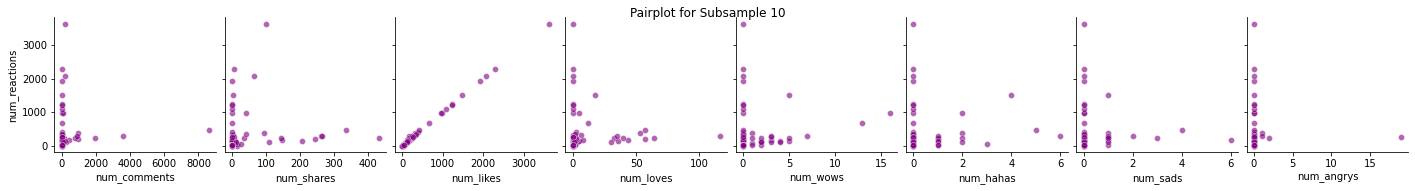

In [18]:
target_variable = 'num_reactions'

def create_pairplots(df, target_variable, num_samples=10, sample_size=100):
    np.random.seed(42)
    for i in range(num_samples):
        subsample = df.sample(sample_size)
        plt.figure(figsize=(12, 10))
        sns.pairplot(subsample, y_vars=[target_variable], x_vars=df.columns.drop(target_variable), kind='scatter', plot_kws={'alpha': 0.6, 'color': 'purple'})
        plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
        plt.show()

create_pairplots(df_cleaned, target_variable, num_samples=10, sample_size=100)

<Figure size 864x720 with 0 Axes>

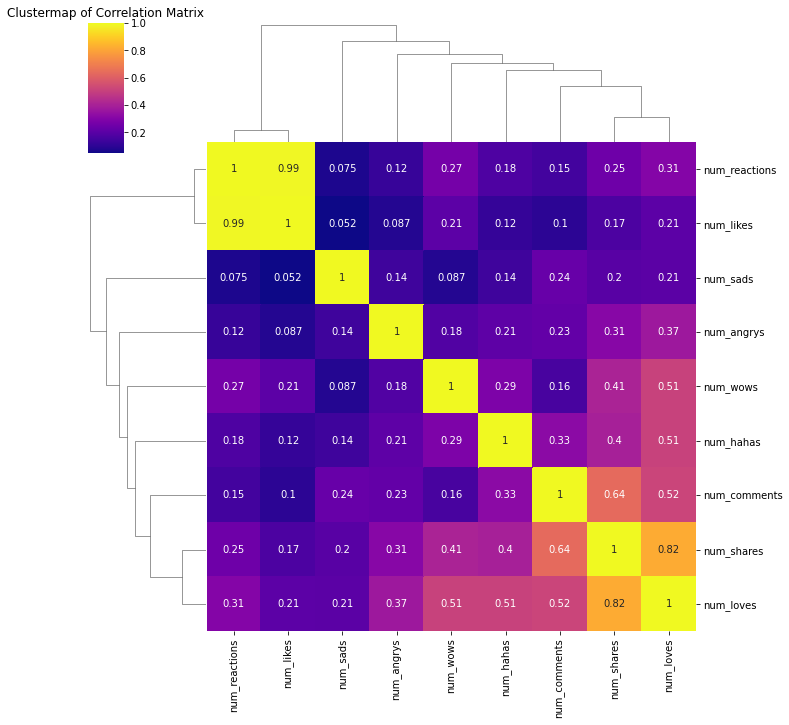

In [19]:
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, cmap='plasma', annot=True)
plt.title('Clustermap of Correlation Matrix')
plt.show()

### $\textbf{Perform SVM modelling}$

In [20]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [21]:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

X = df.drop('num_reactions', axis=1)
y = df['num_reactions']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [29]:
base_model = SVR()
base_model.fit(scaled_X_train, y_train)

SVR()

In [30]:
base_preds = base_model.predict(scaled_X_test)

In [34]:
mean_absolute_error(y_test,base_preds)

156.7793541306022

In [35]:
np.sqrt(mean_squared_error(y_test,base_preds))

394.38605633858526

In [36]:
y_test.mean()

230.03546099290782

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1]
}

svr = SVR()
grid = GridSearchCV(svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [44]:
grid.best_params_

{'C': 1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [45]:
grid_preds = grid.predict(scaled_X_test)
mean_absolute_error(y_test,grid_preds)

0.010097286398322873

In [46]:
np.sqrt(mean_squared_error(y_test,grid_preds))

0.03841002840185311